# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [72]:
# %pip install --upgrade plotly

### Import Statements

In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [74]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [75]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [76]:
print(df_data.shape)
print(df_data.columns)

(962, 16)
Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


In [77]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [78]:
#first yr awarded
print(f"First Nobel Prize awarded:", df_data['year'].min())

#latest yr awarded
print(f"Latest Year Nobel Prize awarded:", df_data['year'].max())


First Nobel Prize awarded: 1901
Latest Year Nobel Prize awarded: 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [79]:
#no duplicates
df_data.duplicated().sum()

0

### Check for NaN Values

In [80]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [81]:
filt = df_data['year']<1980
df_test = df_data.loc[filt]
df_test.isna().sum()

year                       0
category                   0
prize                      0
motivation                78
prize_share                0
laureate_type              0
full_name                  0
birth_date                13
birth_city                13
birth_country             13
birth_country_current     13
sex                       13
organization_name        153
organization_city        153
organization_country     153
ISO                       13
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [82]:
df_data['birth_date']
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

#### Add a Column with the Prize Share as a Percentage

In [83]:
df_data['share_split'] = df_data['prize_share'].str.split("/")

In [84]:

df_data[['num1', 'num2']] = pd.DataFrame(df_data['share_split'].tolist(), index=df_data.index).astype(int)

df_data['percentage'] = df_data['num1'] / df_data['num2'] * 100

In [85]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_split,num1,num2,percentage
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,"[1, 1]",1,1,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,"[1, 1]",1,1,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,"[1, 1]",1,1,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,"[1, 2]",1,2,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,"[1, 2]",1,2,50.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [86]:
gender = df_data['sex'].value_counts()
gender

sex
Male      876
Female     58
Name: count, dtype: int64

In [87]:

fig = px.pie(labels=gender.index,
values=gender.values,
title="Male vs. Female Laureates",
names=gender.index,
hole=0.5,
)

#update the traces to change the text formatting
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [88]:
filt = df_data['sex'] == 'Female'
df_data.loc[filt].sort_values(by='year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_split,num1,num2,percentage
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,"[1, 4]",1,4,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,"[1, 1]",1,1,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,"[1, 1]",1,1,100.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [89]:
df_data[['year','category','laureate_type','full_name']].loc[df_data.duplicated(subset='full_name', keep=False) == True]


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [90]:
nobel_category = df_data['category'].value_counts()

In [91]:
bar = px.bar(x = nobel_category.index, # index = category name
             y = nobel_category.values,
             color=nobel_category.values,
             color_continuous_scale='aggrnyl',
             title='Number of Prizes Awarded per Category')

bar.update_layout(xaxis_title='Nobel Prize Category', 
                         yaxis_title='Number of Awards', 
                         coloraxis_showscale=False)          #to turn on the scale for count on the right
 
bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [92]:
filt = df_data['category'] == 'Economics' 
df_data[['year','category','prize','full_name','sex']].loc[filt].sort_values(by='year', ascending=True)

#the first economics awarded in 1969 to 2 persons: Jan Tinbergen and Ragnar Frisch

,year,category,prize,full_name,sex
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Jan Tinbergen,Male
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Ragnar Frisch,Male
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Paul A. Samuelson,Male
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Simon Kuznets,Male
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,John R. Hicks,Male
...,...,...,...,...,...
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Abhijit Banerjee,Male
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Esther Duflo,Female
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Michael Kremer,Male
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,Paul R. Milgrom,Male


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [93]:
nobel_category = df_data['category'].value_counts()

In [94]:
df_data.groupby(["category", "sex"], as_index=False).agg({'prize': pd.Series.count})

,category,sex,prize
0,Chemistry,Female,7
1,Chemistry,Male,179
2,Economics,Female,2
3,Economics,Male,84
4,Literature,Female,16
5,Literature,Male,101
6,Medicine,Female,12
7,Medicine,Male,210
8,Peace,Female,17
9,Peace,Male,90


In [95]:

cat_by_gender = df_data.groupby(["category","sex"], as_index=False).agg({'prize': pd.Series.count})
cat_by_gender = cat_by_gender.sort_values('prize', ascending=False)
cat_by_gender.head(20)

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [96]:
gender_bar = px.bar(cat_by_gender,
               x='category',
               y='prize',
               title='Category by Gender',
               color='sex',
               barmode='relative',
               color_discrete_map={'Female': 'red', 'Male':'blue'})  #specify the color by gender
 
gender_bar.update_layout(xaxis_title='category',
                    yaxis_title='Total Awards',
                    )
 
gender_bar.show()


# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [97]:
df_data.groupby('year').agg({'prize': pd.Series.count})

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


In [98]:
prize_per_year = df_data.groupby('year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [99]:
moving_average = prize_per_year.rolling(window=5).mean()
moving_average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

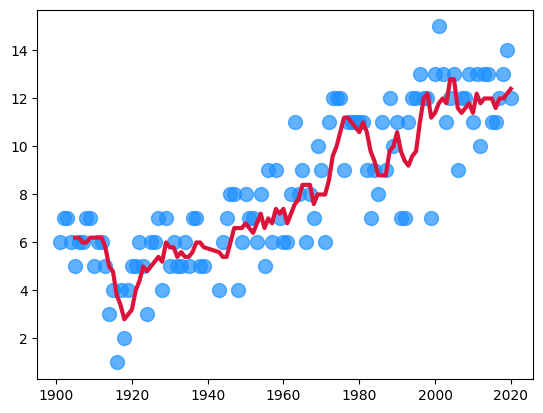

In [100]:
#basic scatter plot
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

In [101]:
#generate an array fro 5-yr tickmark
np.arange(1900, 2021, step=5)

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

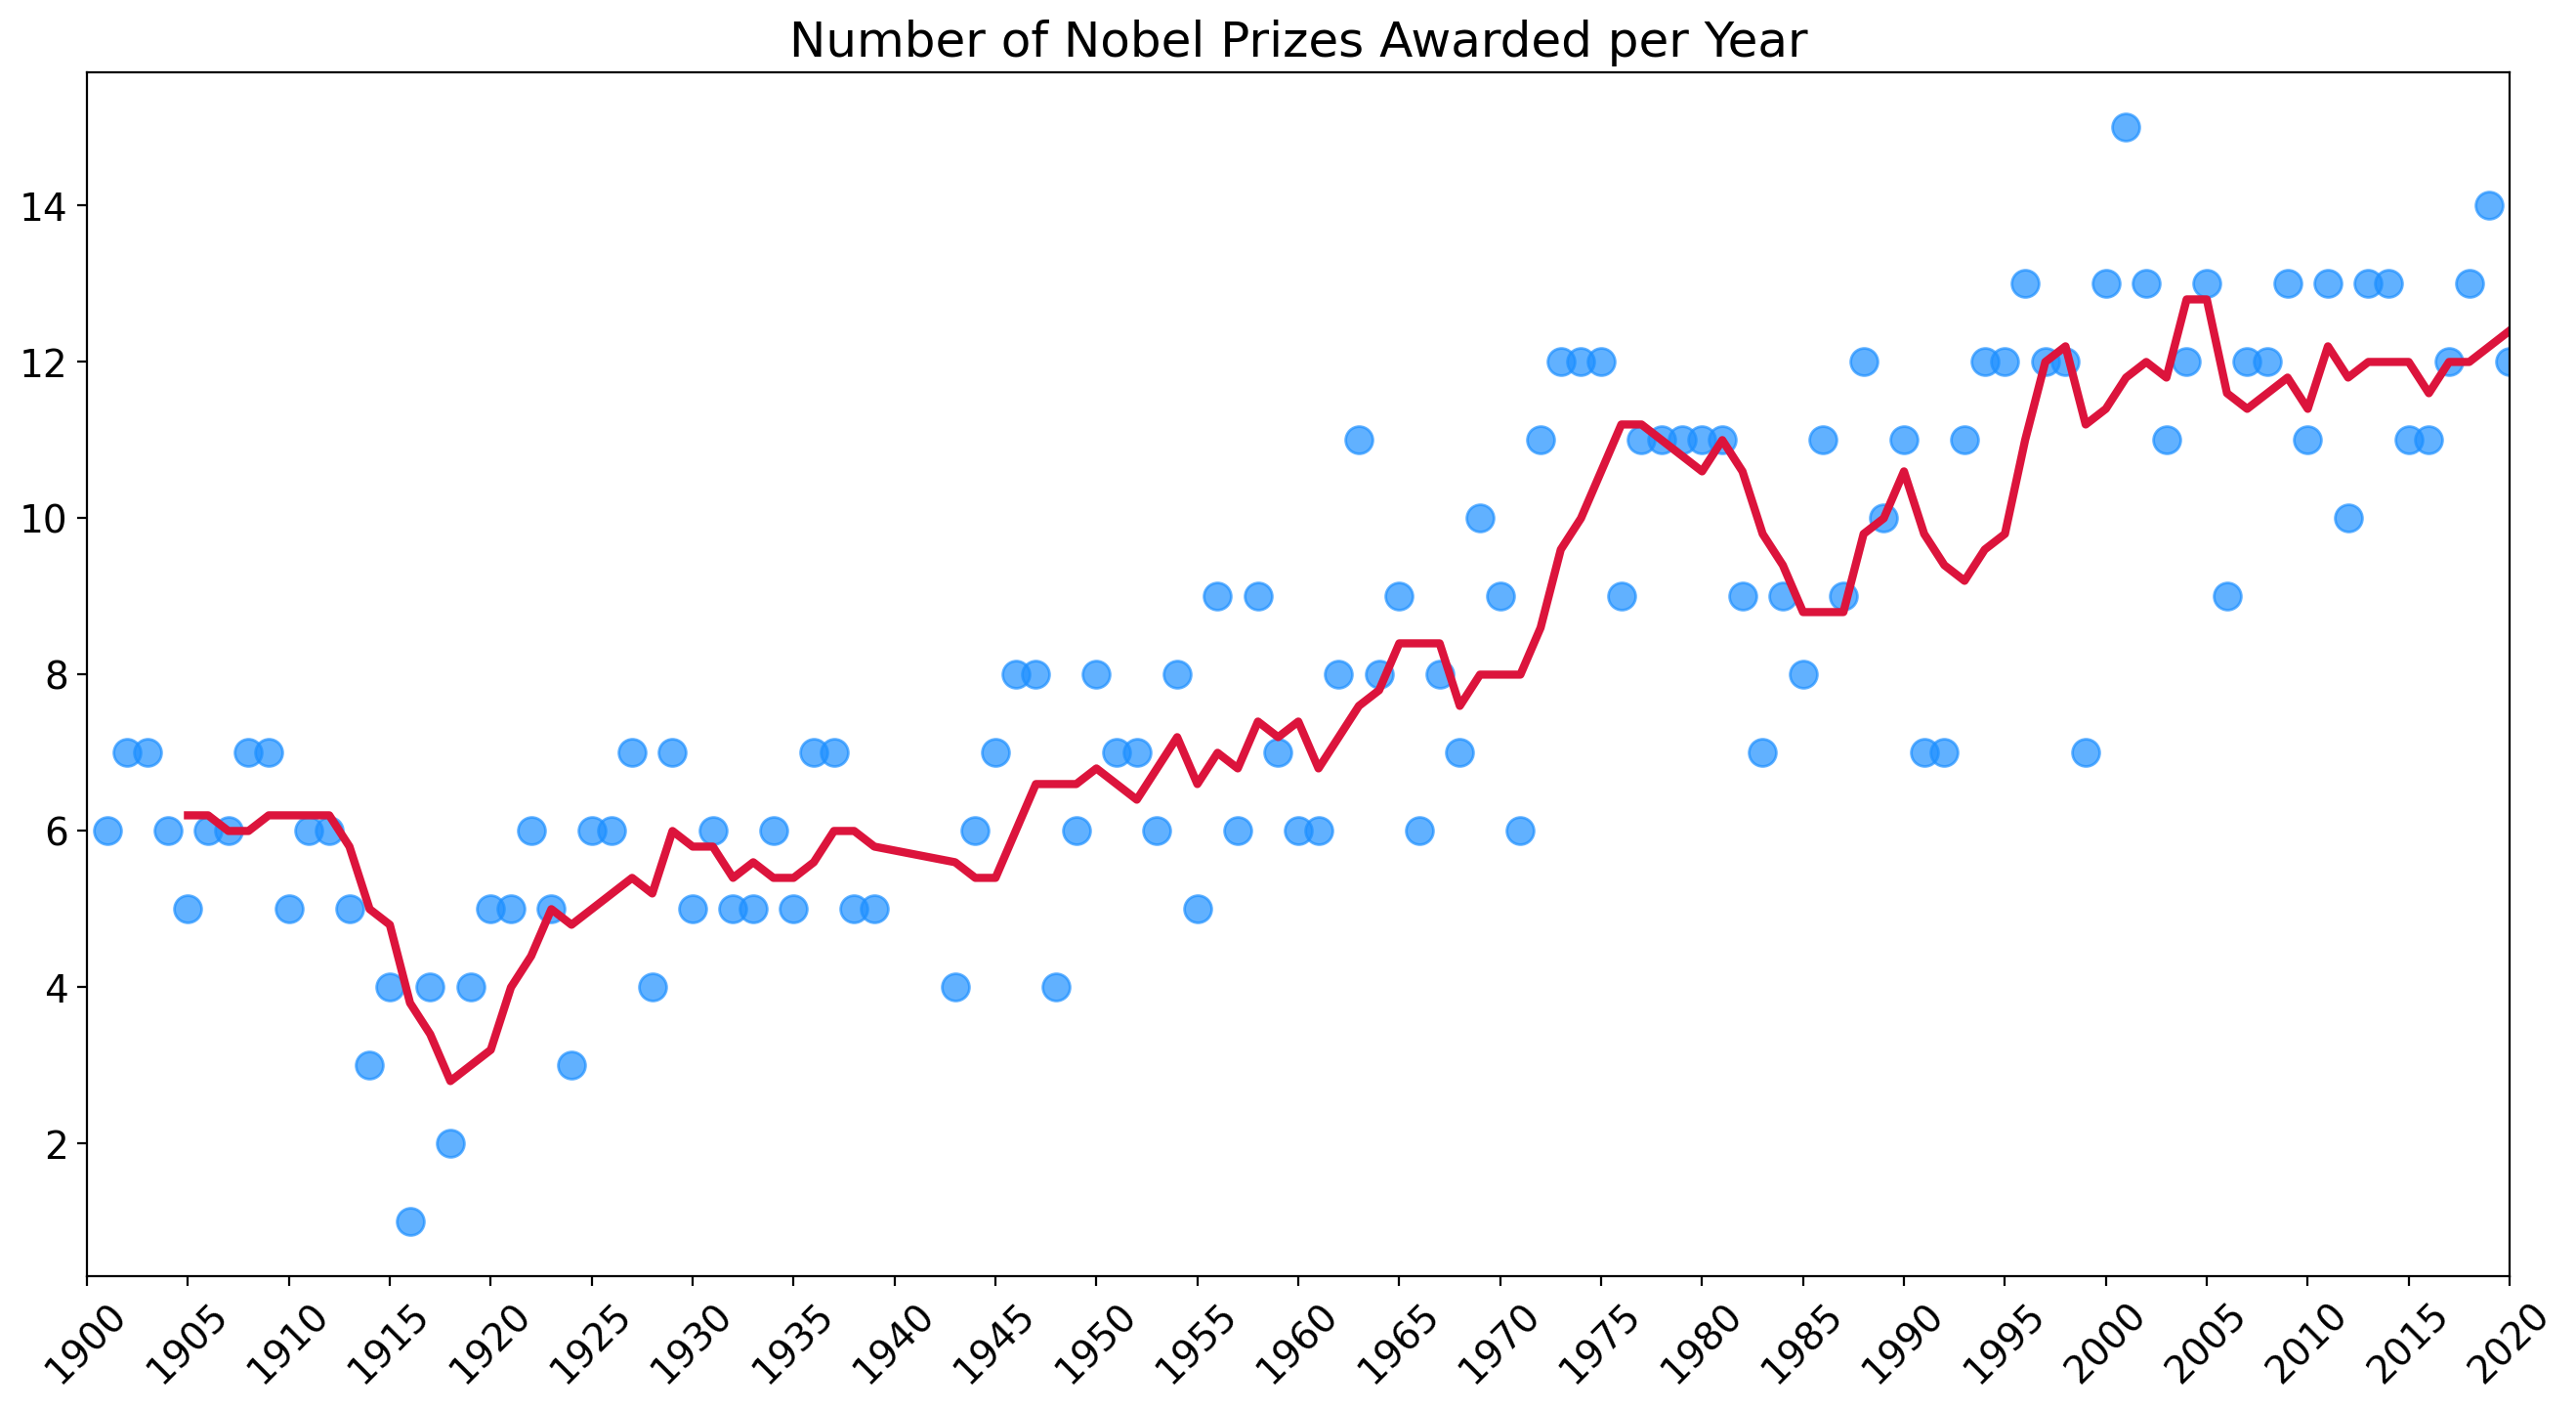

In [102]:
## Proper graph with 5 yrs tickmarks

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), # update the tickmark to 5 years apart
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, #scatter plot
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, #line plot 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [103]:
#average prize share per year
share_per_year = df_data.groupby('year').agg({'percentage': pd.Series.mean})
share_per_year

,percentage
year,
1901,83.33
1902,71.43
1903,71.43
1904,83.33
1905,100.00
...,...
2016,54.55
2017,50.00
2018,46.15


In [104]:
#5 yrs rolling

prize_sum = df_data.groupby('year').agg({'percentage': pd.Series.sum, 'prize': pd.Series.count})
prize_sum



,percentage,prize
year,,
1901,500.00,6
1902,500.00,7
1903,500.00,7
1904,500.00,6
1905,500.00,5
...,...,...
2016,600.00,11
2017,600.00,12
2018,600.00,13


In [105]:
prize_rolling_average = prize_sum['percentage'].rolling(window=5).sum() / prize_sum['prize'].rolling(window=5).sum() 
prize_rolling_average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905   80.65
        ... 
2016   51.72
2017   50.00
2018   50.00
2019   49.18
2020   48.39
Length: 117, dtype: float64

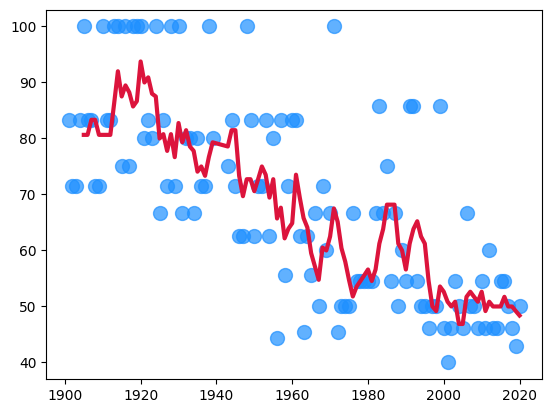

In [106]:
#basic scatter plot
plt.scatter(x=share_per_year.index, 
           y=share_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(share_per_year.index, 
        prize_rolling_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

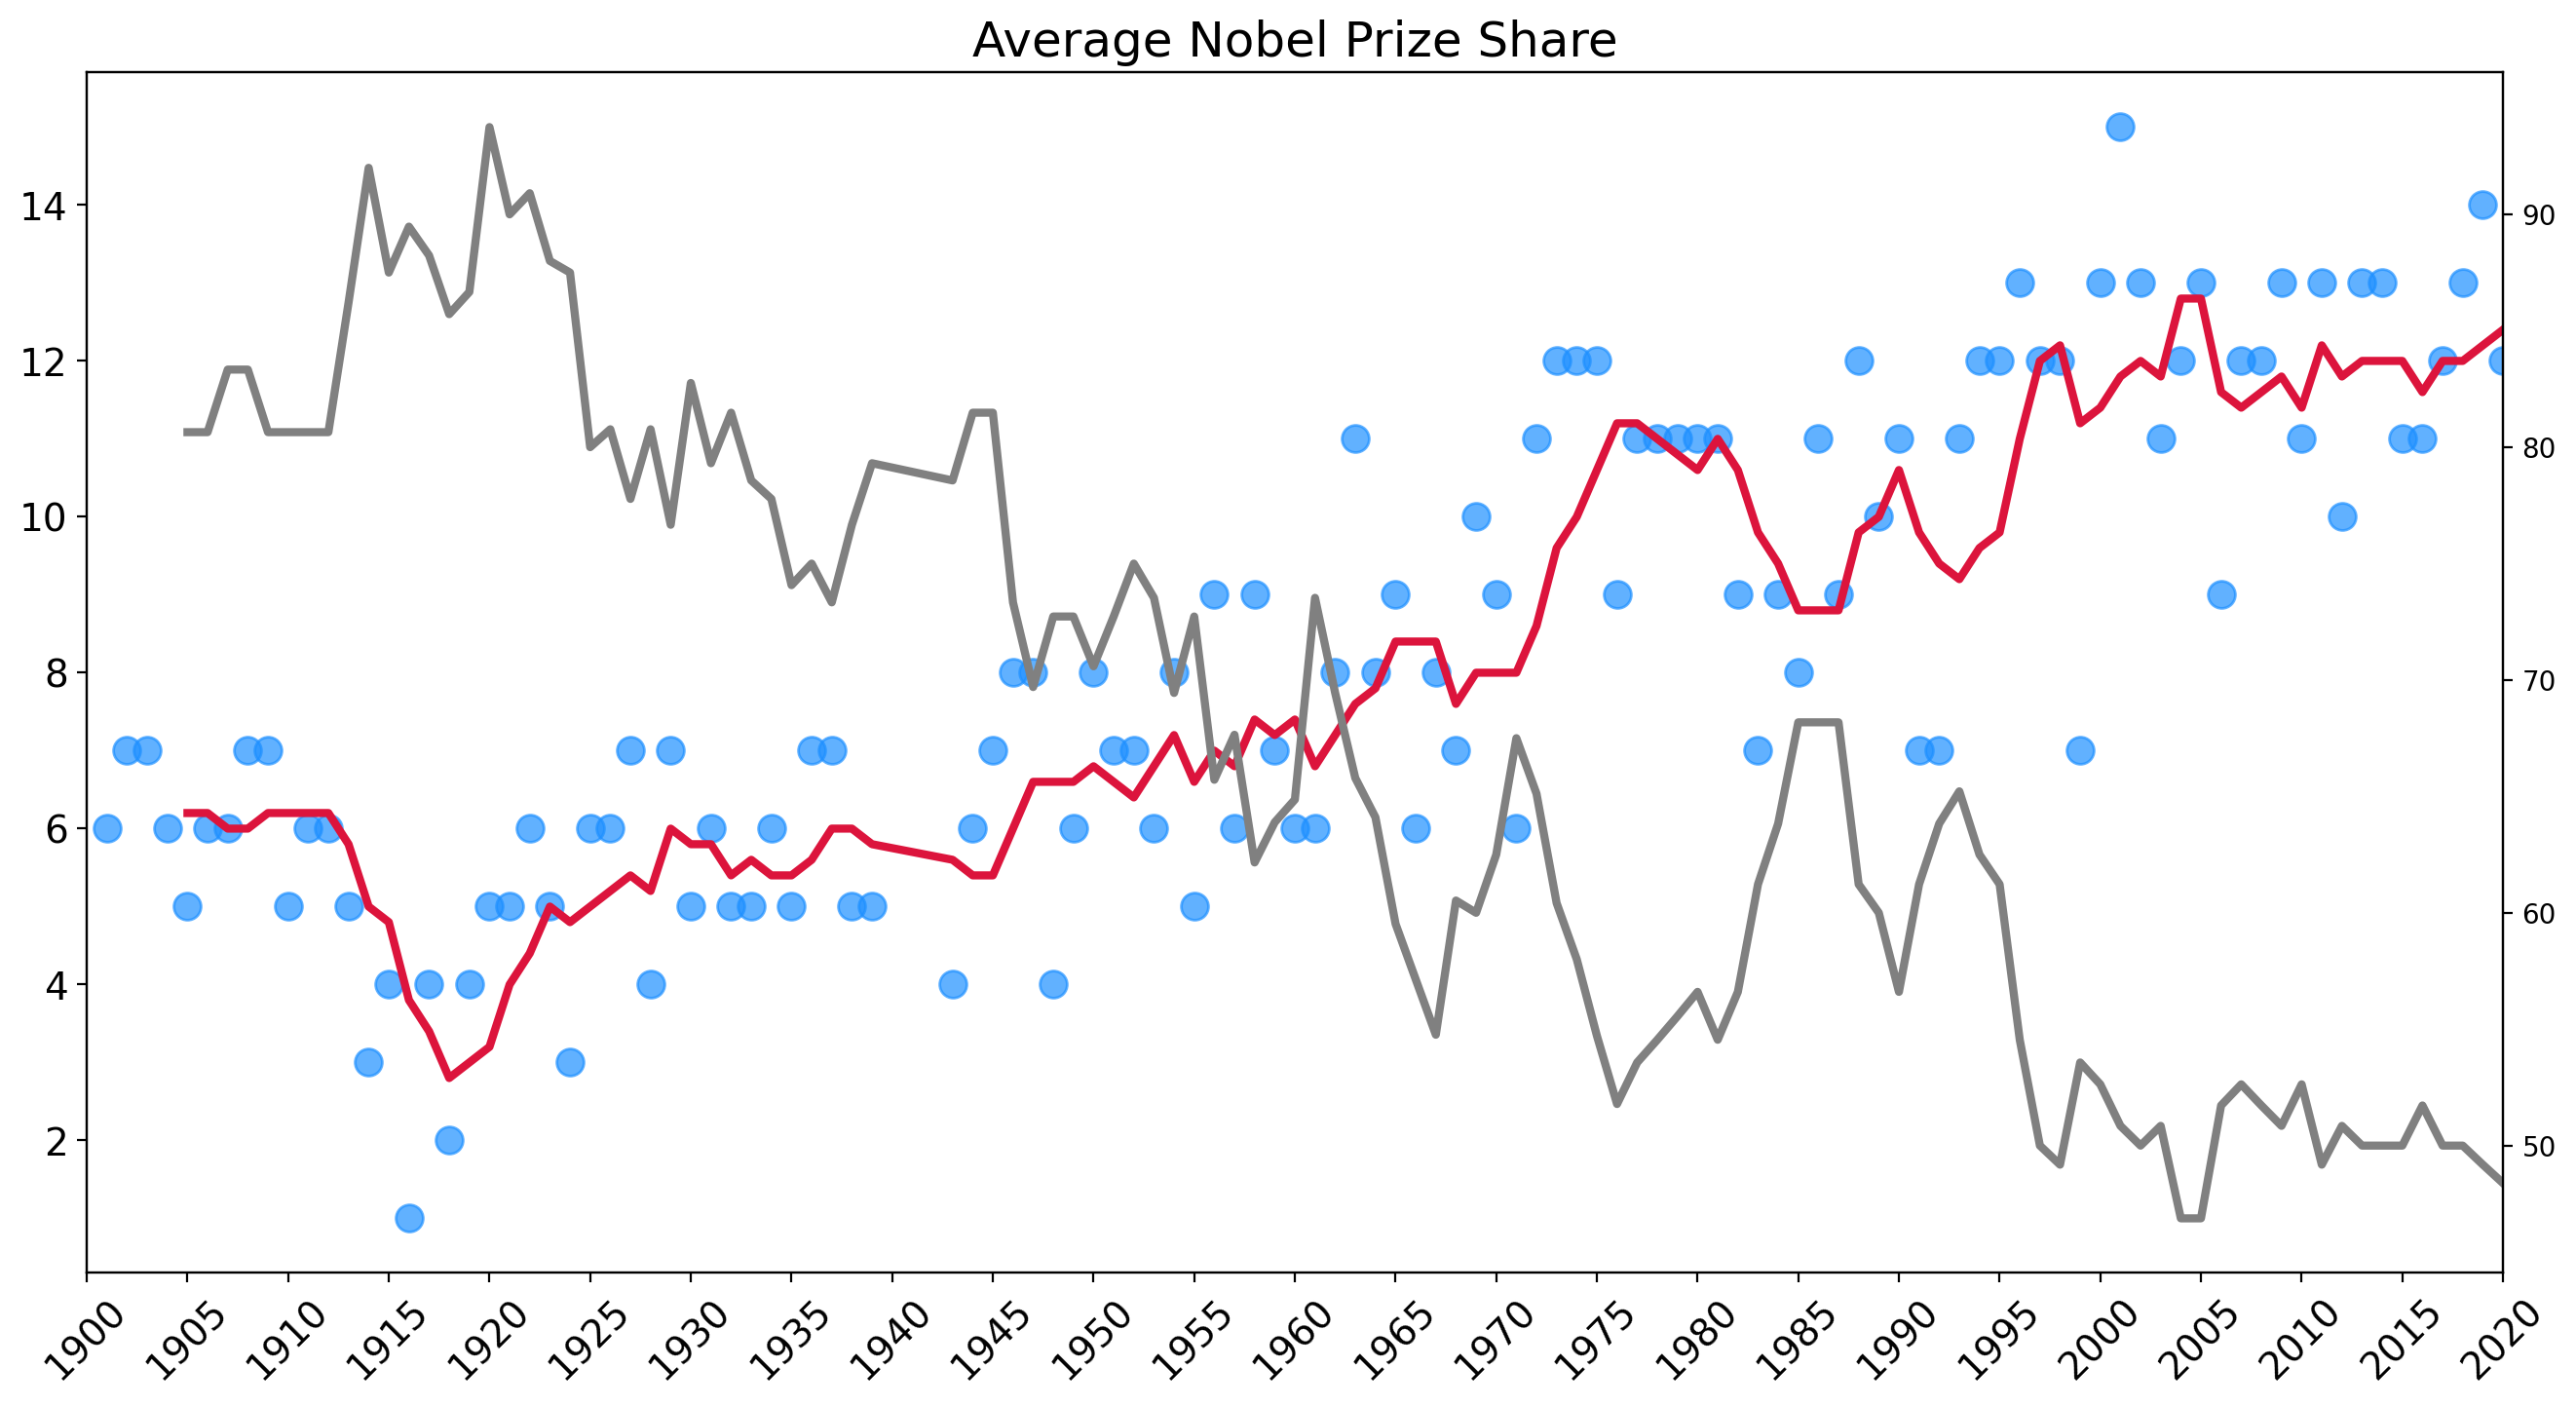

In [107]:
## Combining 2 plots:  Number of Awards and Average Share in 5 yrs rolling

plt.figure(figsize=(16,8), dpi=200)
plt.title('Average Nobel Prize Share', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), # update the tickmark to 5 years apart
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()  #create a second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, #scatter plot
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, #line plot 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)


## Adding the prize share plot on second axis
ax2.plot(share_per_year.index, #line plot 
        prize_rolling_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

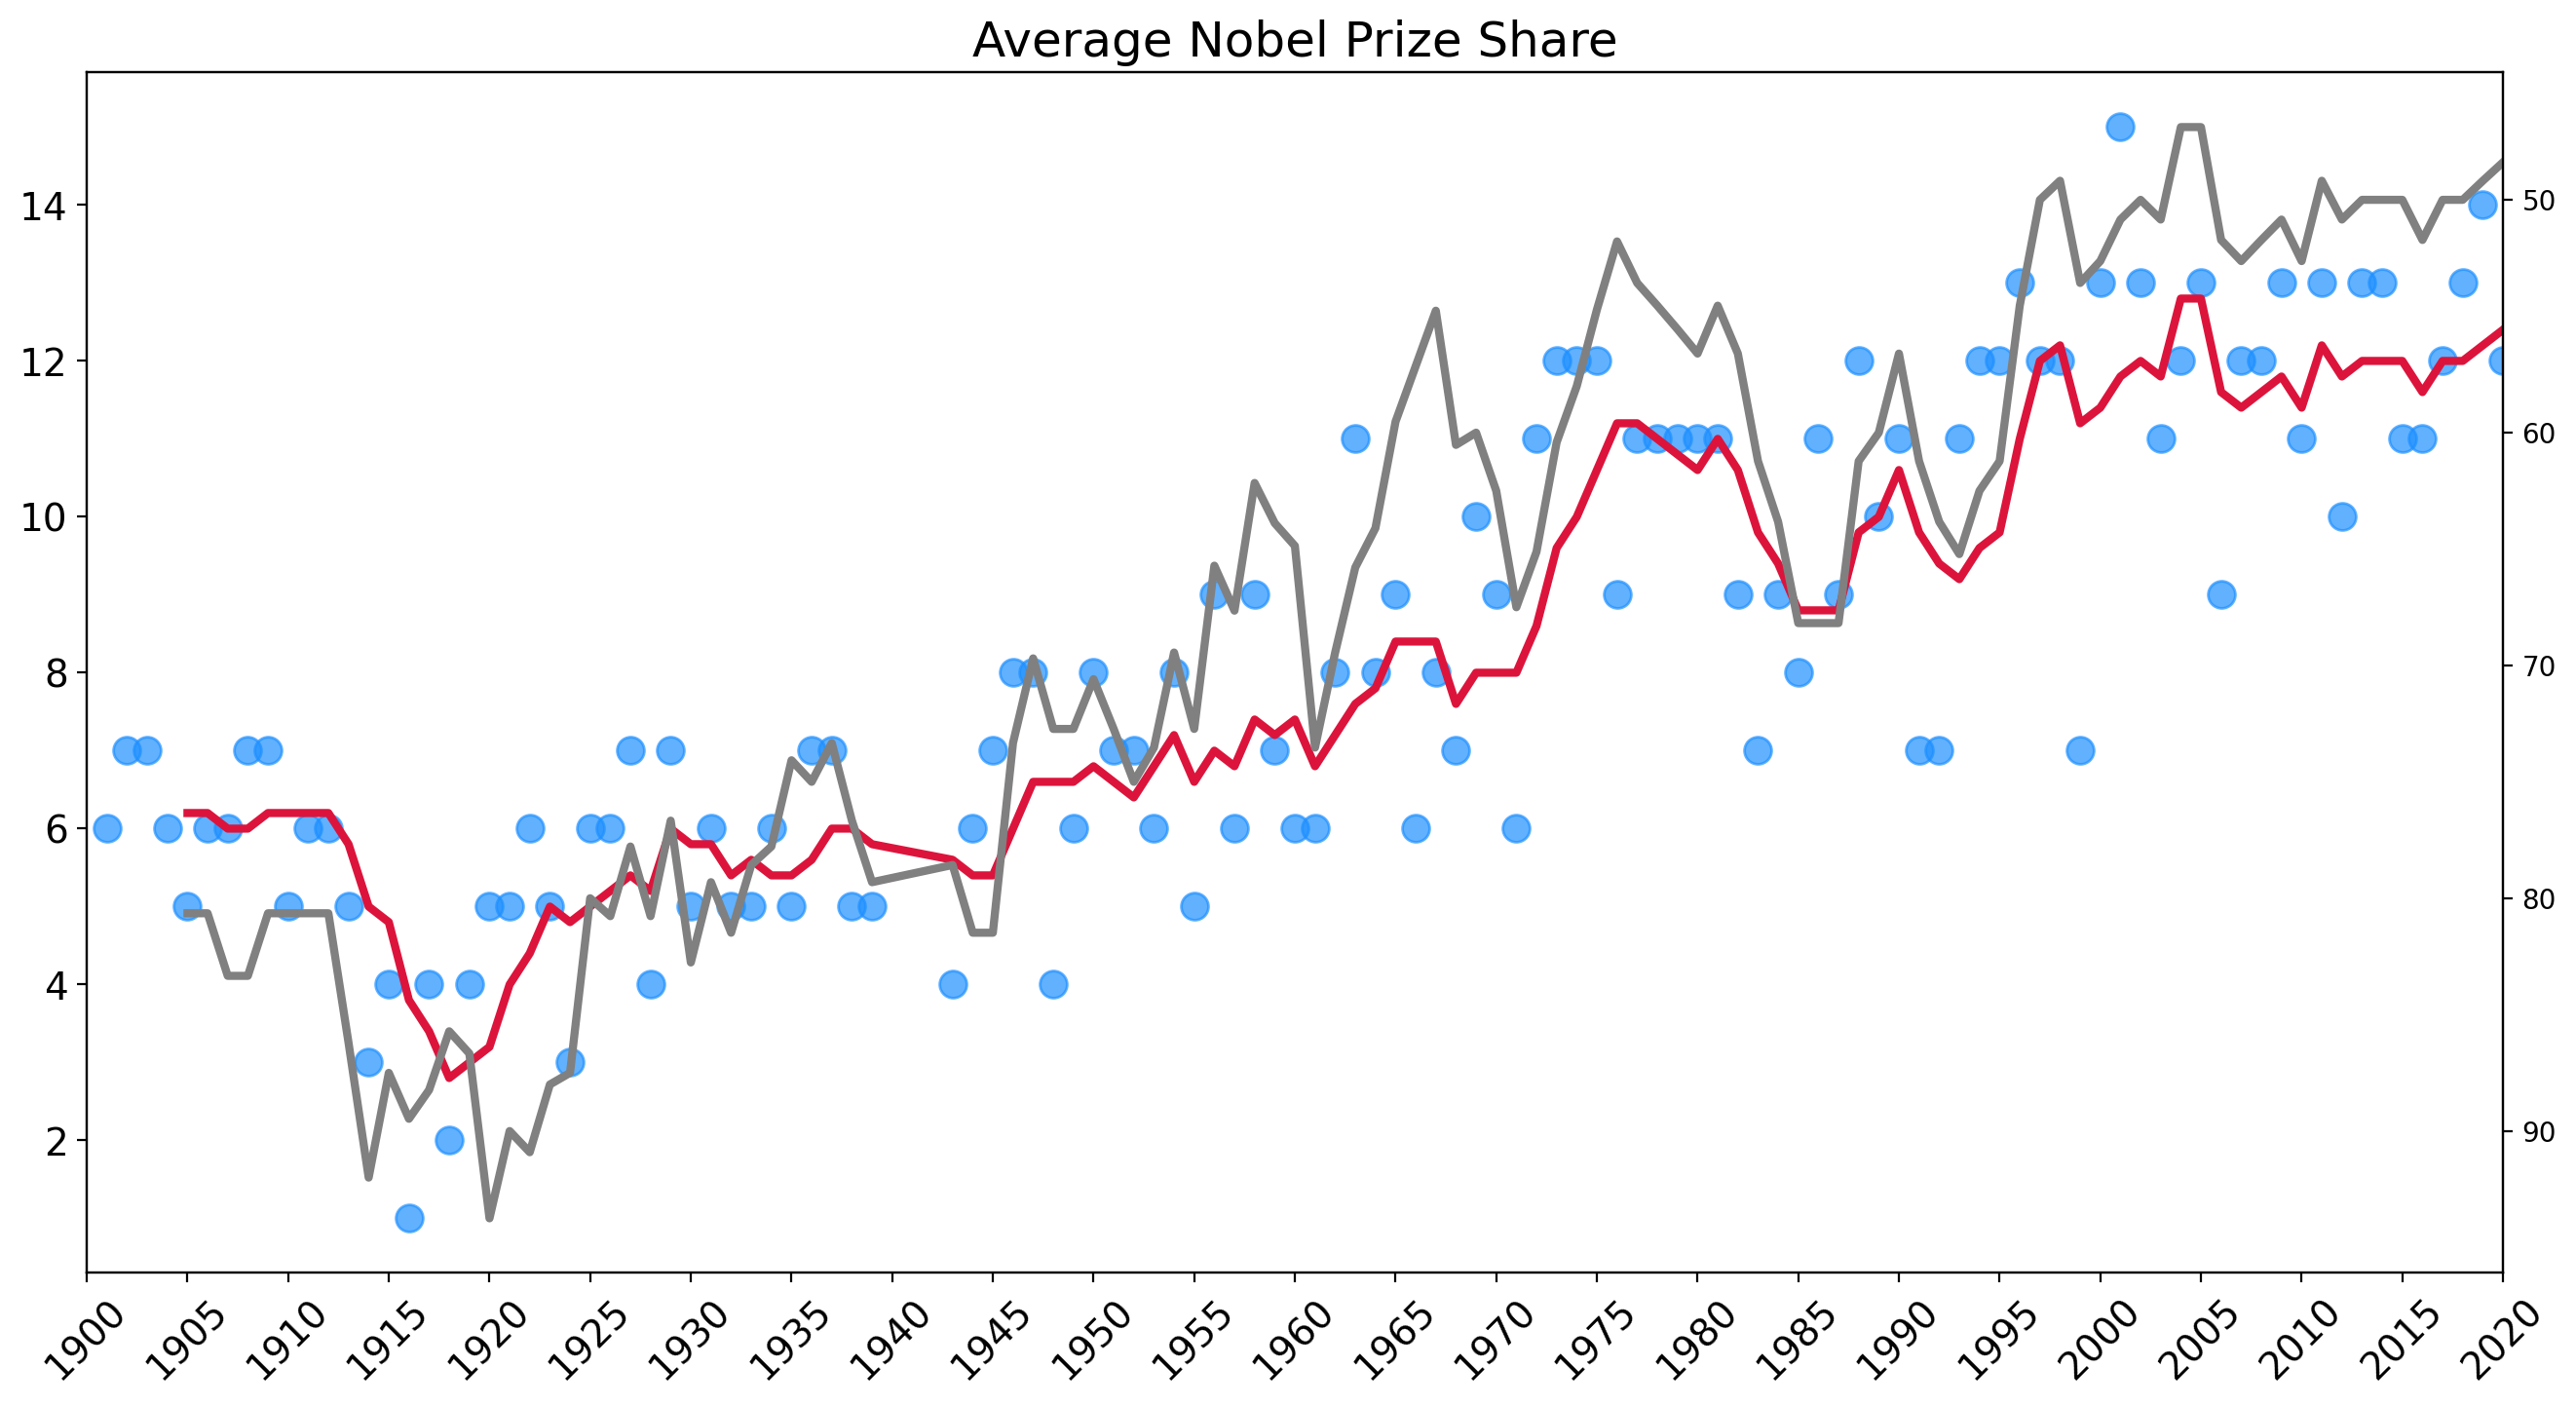

In [108]:
## To see the relationship more clearly -- invert the second y-axis. 


plt.figure(figsize=(16,8), dpi=200)
plt.title('Average Nobel Prize Share', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), # update the tickmark to 5 years apart
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()  #create a second y-axis
ax1.set_xlim(1900, 2020)
 
# Can invert axis
ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index, #scatter plot
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, #line plot 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)


## Adding the prize share plot on second axis
ax2.plot(share_per_year.index, #line plot 
        prize_rolling_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

## What do we see on the chart? 

Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [109]:
#top 20 countries using "birth_country_current"
top20_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False).head(20)
top20_countries

#reverse the order for plotting later.
top20_countries = top20_countries.sort_values(by='prize')
top20_countries

,birth_country_current,prize
65,South Africa,9
7,Belgium,9
33,India,9
2,Australia,10
54,Norway,12
13,China,12
20,Denmark,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [110]:
#top 20 countries using "birth_country"
#not a big shift in number except for UK and Germany
df_data.groupby('birth_country', as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False).head(20)

,birth_country,prize
118,United States of America,281
117,United Kingdom,91
45,Germany,65
41,France,54
107,Sweden,29
62,Japan,27
25,Canada,20
108,Switzerland,19
73,Netherlands,18
61,Italy,17


In [111]:
#top 20 countries using "organization_country". 
#The country distribution changes drastically if we use this field (and due to large number of missing values)
df_data.groupby('organization_country', as_index=False).agg({'prize': pd.Series.count}).sort_values(by='prize', ascending=False).head(20)

,organization_country,prize
26,United States of America,368
25,United Kingdom,93
10,Germany,67
9,France,38
23,Switzerland,24
16,Japan,18
22,Sweden,17
20,Russia,12
17,Netherlands,11
4,Canada,9


#### Why not "Organization_Country"
It has too many null values.

In [112]:
df_data.isnull().sum()
## based on table below, it is not advisable to use "organization_country" because it has so many missing values

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
share_split                0
num1                       0
num2                       0
percentage                 0
dtype: int64

#### Problem with using "birth_country"

As you can see below, many countries such as Germany, Poland, Italy, Denmark have different name. 
It is best to use the "birth_countr_current" since the names are more relevant today.

In [113]:
df_data[['birth_country','birth_country_current','organization_country']].head(20)


,birth_country,birth_country_current,organization_country
0,Netherlands,Netherlands,Germany
1,France,France,NaN
2,Prussia (Poland),Poland,Germany
3,France,France,NaN
4,Switzerland,Switzerland,NaN
5,Prussia (Germany),Germany,Germany
6,Prussia (Germany),Germany,Germany
7,Schleswig (Germany),Germany,NaN
8,India,India,United Kingdom
9,Switzerland,Switzerland,NaN


#### Plot the horizontal bar chart. 

In [114]:

fig = px.bar(top20_countries,
             x='prize',
             y="birth_country_current", 
             orientation='h',
             title='Top 20 Countries by Number of Prizes',
             color='prize',
             color_continuous_scale='agsunset')

fig.update_layout(xaxis_title='Total Prizes', 
                         yaxis_title='Birth Countries', 
                         coloraxis_showscale=False)   
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [115]:
## we need to rank the total prize so it shows on the color map

df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [116]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

In [117]:
## My solution
fig = px.choropleth(df_data, 
                    locations='ISO',
                    color='prize',
                    hover_name='birth_country_current', 
                    color_continuous_scale = px.colors.sequential.matter)

fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [118]:
cat_country = df_data.groupby(['birth_country_current','category'], as_index=False).agg({'prize':'count'})

cat_country.sort_values(by='prize', ascending=False, inplace=True)

cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [119]:
# Merge with Top20 DF we created previously (it has total prize by country)

merged_df = pd.merge(cat_country, top20_countries, on="birth_country_current")

#change column name 
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 

merged_df.sort_values(by='total_prize', inplace=True)

merged_df

,birth_country_current,category,cat_prize,total_prize
54,South Africa,Peace,3,9
106,India,Chemistry,1,9
100,Belgium,Physics,1,9
99,Belgium,Literature,1,9
98,Belgium,Chemistry,1,9
...,...,...,...,...
2,United States of America,Chemistry,55,281
19,United States of America,Literature,10,281
9,United States of America,Peace,19,281
1,United States of America,Physics,70,281


In [120]:
bar_fig = px.bar(merged_df,
             x='total_prize',
             y="birth_country_current", 
             orientation='h',
             title='Country Prizes by Category',
             color='category')

bar_fig.update_layout(xaxis_title='Total Prizes', 
                         yaxis_title='Countries', 
                         width=1200, height=500,
                         coloraxis_showscale=False)   
bar_fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [121]:
#count num of prize by country and by year
prize_by_year = df_data.groupby(by=['birth_country_current','year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [122]:
# create series that has cumulative sum of the num of prizes
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [123]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [124]:
prize_by_org = df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})
prize_by_org = prize_by_org.sort_values(by=['prize'], ascending=False).head(25)
prize_by_org

,organization_name,prize
196,University of California,40
68,Harvard University,29
167,Stanford University,23
117,Massachusetts Institute of Technology (MIT),21
198,University of Chicago,20
197,University of Cambridge,18
26,California Institute of Technology (Caltech),17
38,Columbia University,17
146,Princeton University,15
152,Rockefeller University,13


## Bar chart to show top organizations

In [125]:
bar_fig = px.bar(prize_by_org,
             x='prize',
             y='organization_name', 
             orientation='h',
             title='Nobel Prize by Organization',
             color='organization_name')

bar_fig.update_layout(xaxis_title='Total Prizes', 
                         yaxis_title='Org Name', 
                         width=1200, height=500,
                         coloraxis_showscale=False)   
bar_fig.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [126]:
# create a DF with org city and total 
prize_by_org_city = df_data.groupby(['organization_city'], as_index=False).agg({'prize': pd.Series.count})
prize_by_org_city = prize_by_org_city.sort_values(by=['prize','organization_city'], ascending=[False, False]).head(20)
prize_by_org_city

,organization_city,prize
34,"Cambridge, MA",50
121,"New York, NY",45
33,Cambridge,31
92,London,27
128,Paris,25
156,"Stanford, CA",24
12,"Berkeley, CA",21
39,"Chicago, IL",20
135,"Princeton, NJ",19
129,"Pasadena, CA",17


In [127]:
bar_fig = px.bar(prize_by_org_city,
             x='prize',
             y='organization_city', 
             orientation='h',
             title='Nobel Prize by Organization City',
             color='organization_city')

bar_fig.update_layout(xaxis_title='Total Prizes', 
                         yaxis_title='City', 
                         width=1200, height=500,
                         coloraxis_showscale=False)   
bar_fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [128]:
top_birth_city = df_data.groupby('birth_city', as_index=False).agg({'prize': 'count'})
top_birth_city = top_birth_city.sort_values(by='prize', ascending=False).head(20)

#sort again for display
top_birth_city = top_birth_city.sort_values(by='prize')
top_birth_city

,birth_city,prize
92,"Cambridge, MA",3
356,Montreal,4
428,"Pittsburgh, PA",4
87,Cairo,4
167,Frankfurt-on-the-Main,5
440,Prague,5
210,Hamburg,6
515,Stockholm,6
358,Moscow,7
363,Munich,7


In [129]:
bar_fig = px.bar(top_birth_city,
             x='prize',
             y='birth_city', 
             orientation='h',
             title='Birth City',
             color='prize',
             color_continuous_scale = px.colors.sequential.Plasma)

bar_fig.update_layout(xaxis_title='Total Prizes', 
                         yaxis_title='Birth City', 
                         width=1200, height=500,
                         coloraxis_showscale=False)   
bar_fig.show()

In [130]:
#birth city by percentage
top_birth_city['percent'] = top_birth_city['prize'] / top_birth_city['prize'].sum() *100
top_birth_city

,birth_city,prize,percent
92,"Cambridge, MA",3,1.38
356,Montreal,4,1.83
428,"Pittsburgh, PA",4,1.83
87,Cairo,4,1.83
167,Frankfurt-on-the-Main,5,2.29
440,Prague,5,2.29
210,Hamburg,6,2.75
515,Stockholm,6,2.75
358,Moscow,7,3.21
363,Munich,7,3.21


In [131]:
#% of Laureates born in New York - 24%

#london, paris, vienna (14 + 19 + 26) = 59 --> as many as from NY

#of top 5 cities, NY is about 53 / 124 = 43% of all.


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [132]:
org_by_country = df_data.groupby(['organization_country','organization_city','organization_name'], as_index=False).agg({'prize': 'count'})
org_by_country

,organization_country,organization_city,organization_name,prize
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1
...,...,...,...,...
286,United States of America,"West Lafayette, IN",Purdue University,2
287,United States of America,"Wilmington, DE",Du Pont,1
288,United States of America,"Woods Hole, MA",Marine Biological Laboratory (MBL),1
289,United States of America,"Worcester, MA",University of Massachusetts Medical School,1


In [133]:
#sunburst 
fig = px.sunburst(org_by_country, 
                  path=['organization_country','organization_city','organization_name'], 
                  values='prize',
                  title="Where do Discoveries Take Place?")

fig.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)

fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [134]:
birth_year = df_data['birth_date'].dt.year
df_data['winning_age'] = df_data['year'] - birth_year
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,...,sex,organization_name,organization_city,organization_country,ISO,share_split,num1,num2,percentage,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,...,Male,Berlin University,Berlin,Germany,NLD,"[1, 1]",1,1,100.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,...,Male,NaN,NaN,NaN,FRA,"[1, 1]",1,1,100.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),...,Male,Marburg University,Marburg,Germany,POL,"[1, 1]",1,1,100.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,...,Male,NaN,NaN,NaN,FRA,"[1, 2]",1,2,50.00,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,...,Male,NaN,NaN,NaN,CHE,"[1, 2]",1,2,50.00,73.00


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [135]:
df_data['winning_age'].describe()
#min age: 17, max: 97

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [136]:
#youngest 
df_data.loc[df_data['winning_age']==df_data['winning_age'].min()]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,...,sex,organization_name,organization_city,organization_country,ISO,share_split,num1,num2,percentage,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,...,Female,NaN,NaN,NaN,PAK,"[1, 2]",1,2,50.00,17.00


In [137]:
#youngest 
df_data.loc[df_data['winning_age']==df_data['winning_age'].max()]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,...,sex,organization_name,organization_city,organization_country,ISO,share_split,num1,num2,percentage,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,...,Male,University of Texas,Austin TX,United States of America,DEU,"[1, 3]",1,3,33.33,97.00


In [138]:
import numpy
q_75 = df_data['winning_age'].quantile(0.75)
print(f"75% of them are younger than {q_75} when winning the award.")
print(f"The average age is {df_data['winning_age'].mean()}.")

75% of them are younger than 69.0 when winning the award.
The average age is 59.94860813704497.


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

<Axes: xlabel='winning_age', ylabel='Count'>

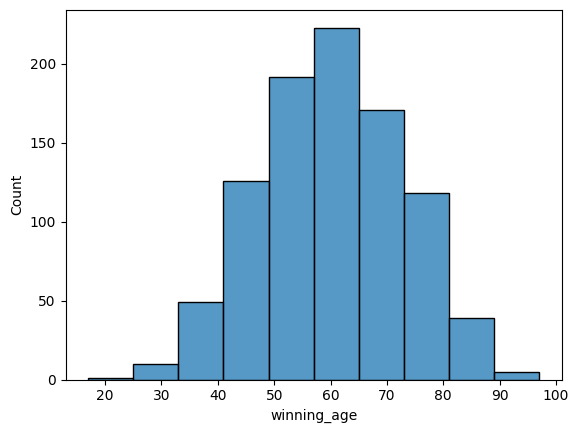

In [139]:
sns.histplot(data=df_data, 
             x='winning_age', 
             bins=10)

<Axes: xlabel='winning_age', ylabel='Count'>

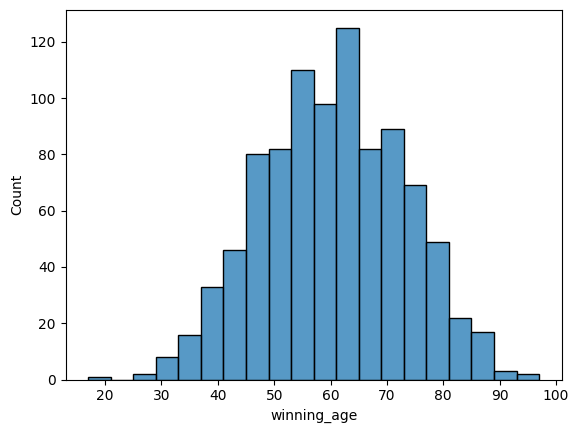

In [140]:
sns.histplot(data=df_data, 
             x='winning_age', 
             bins=20)

<Axes: xlabel='winning_age', ylabel='Count'>

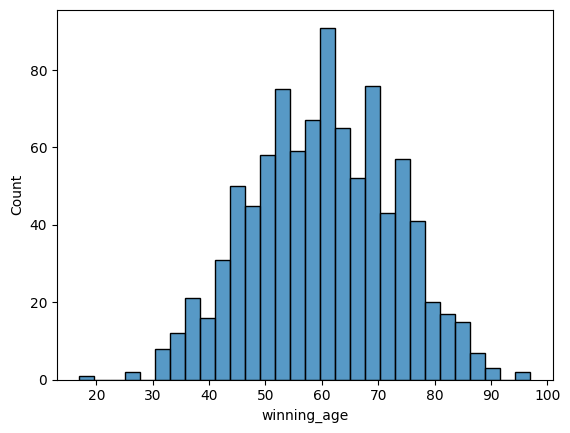

In [142]:

sns.histplot(data=df_data, 
             x='winning_age', 
             bins=30)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


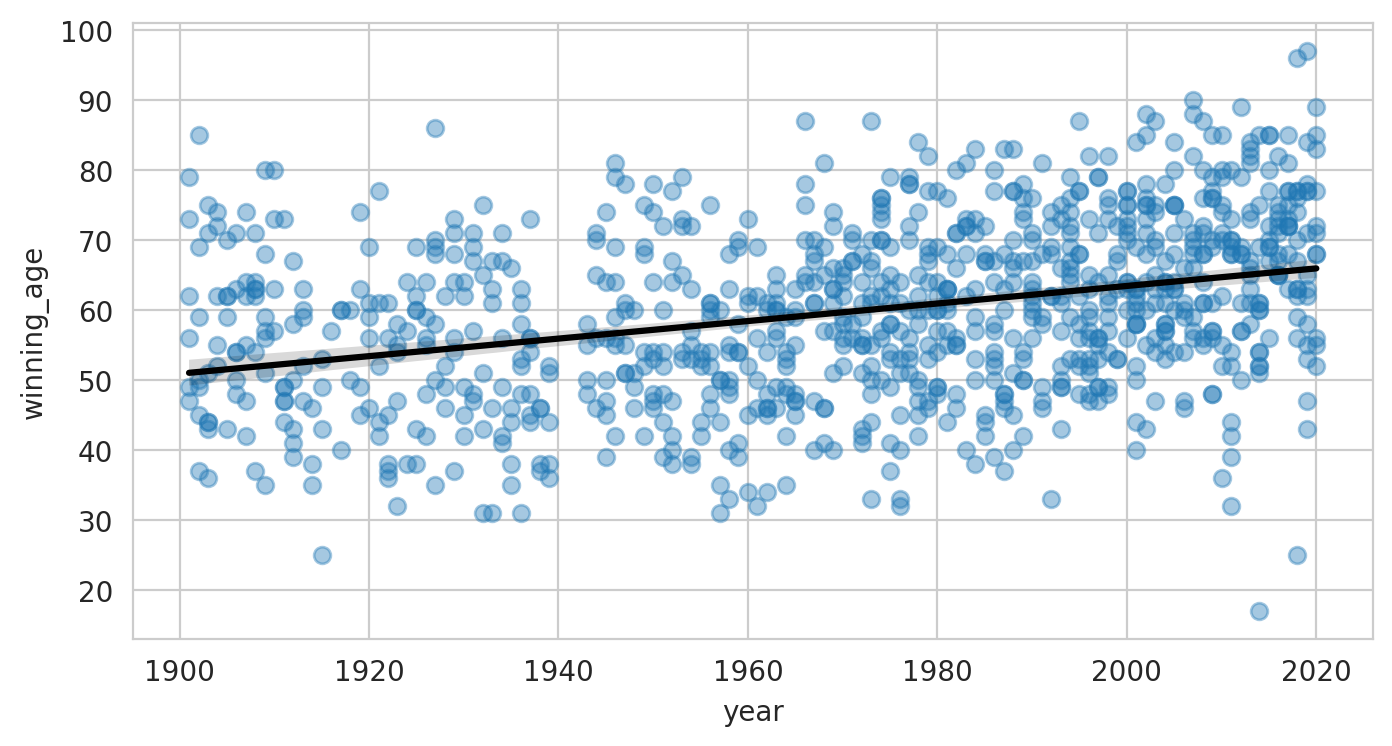

In [148]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

<Axes: xlabel='category', ylabel='winning_age'>

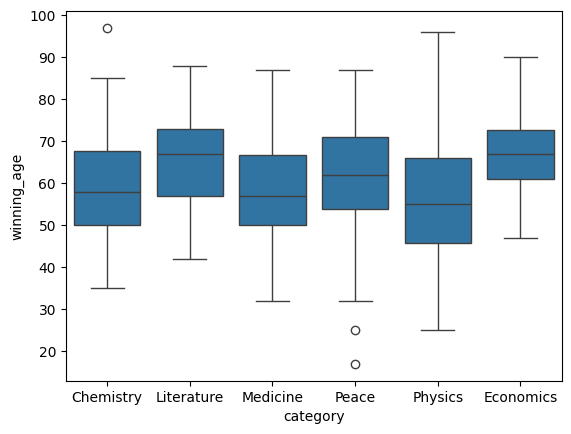

In [149]:
sns.boxplot(data=df_data, x="category", y="winning_age")

In [150]:
#box plot with plotly
fig = px.box(df_data, x="category", y="winning_age")
fig.show()

In [ ]:
# category w oldest winners: Econ/Literature (mean:67)
# category w youngest winners: physics (mean: 55)

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


In [153]:
filt = df_data['category'] == 'Chemistry'
df_chem = df_data.loc[filt]

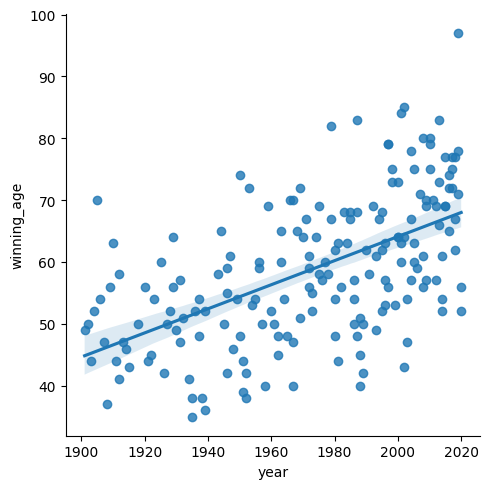

In [157]:
#chemistry
sns.lmplot(data=df_chem, x="year", y="winning_age")

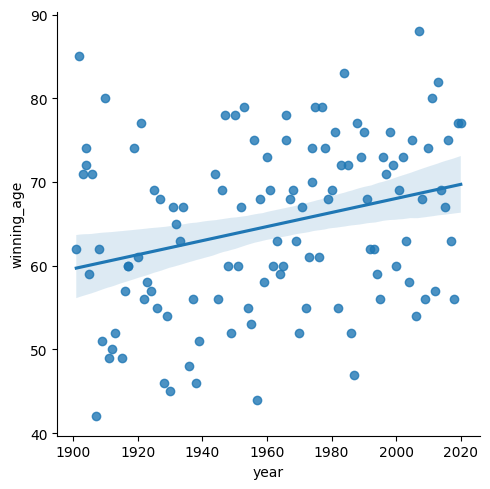

In [158]:
#Literature
filt = df_data['category'] == 'Literature'
df_literature = df_data.loc[filt]

sns.lmplot(data=df_literature, x="year", y="winning_age")

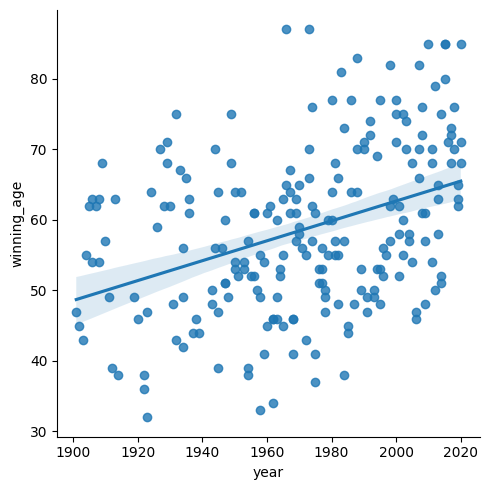

In [159]:
#Medicine
filt = df_data['category'] == 'Medicine'
df_med = df_data.loc[filt]

sns.lmplot(data=df_med, x="year", y="winning_age")

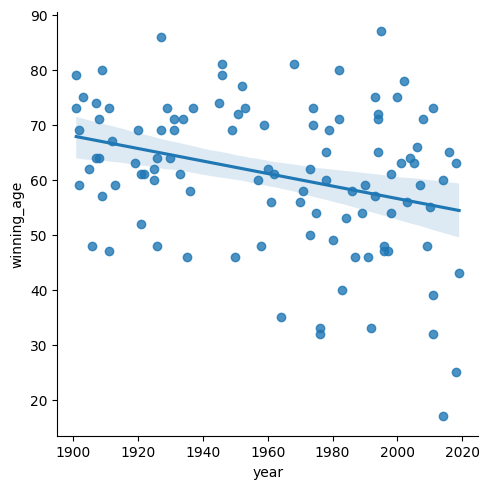

In [160]:
#Peace
filt = df_data['category'] == 'Peace'
df_peace = df_data.loc[filt]

sns.lmplot(data=df_peace, x="year", y="winning_age")

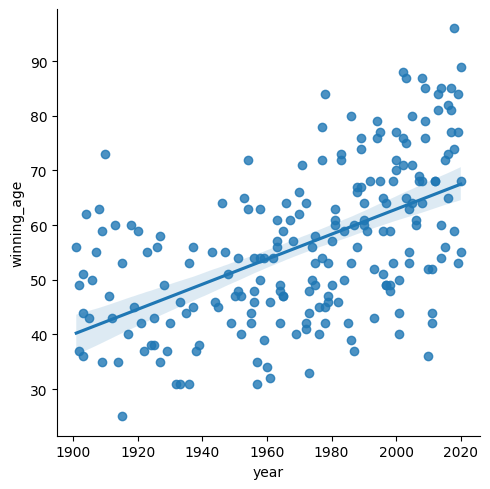

In [161]:
#Physics
filt = df_data['category'] == 'Physics'
df_phy = df_data.loc[filt]

sns.lmplot(data=df_phy, x="year", y="winning_age")

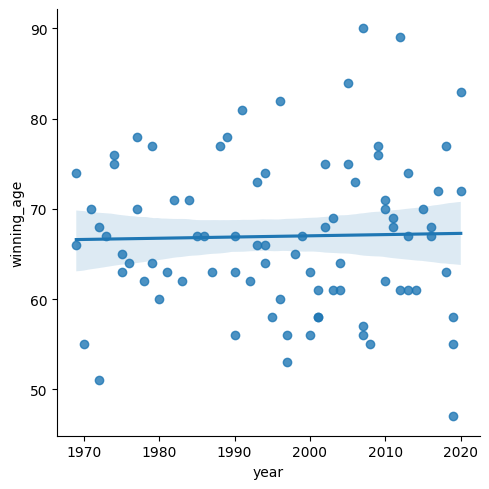

In [162]:
#Economics
filt = df_data['category'] == 'Economics'
df_econ = df_data.loc[filt]

sns.lmplot(data=df_econ, x="year", y="winning_age")

Winning Age by Category:
- The average winning age goes up for most category except 2.
- For Peace, the average winning age is going down. 
- For Econ, the average winning age is almost the same. 

The .lmplot() is showing trend overtime, while boxplot shows the spread of the age. 

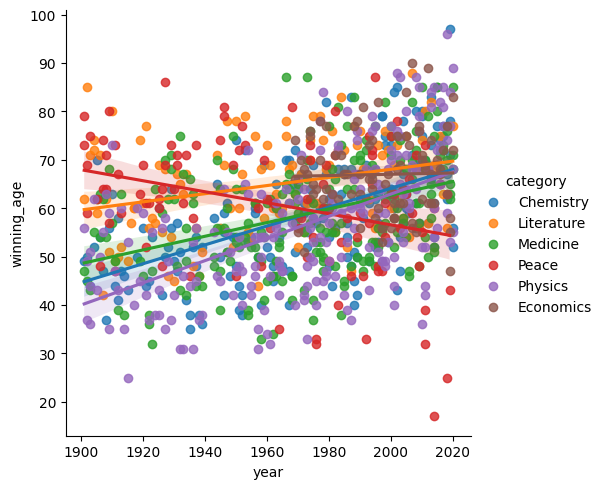

In [166]:
#.lmplot() with hue to combine all categoies in 1 graph.


sns.lmplot(data=df_data, x="year", 
y="winning_age", 
hue='category')